<p> Used the Dataset, to pracise on Decision tree, KNN and SVM </p>

In [80]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_predict,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
439,31,Yes,Travel_Frequently,534,Research & Development,20,3,Life Sciences,1,587,...,1,80,0,12,2,3,1,0,0,0
178,46,No,Travel_Rarely,526,Sales,1,2,Marketing,1,244,...,3,80,3,24,2,3,24,13,15,7
143,30,No,Travel_Rarely,438,Research & Development,18,3,Life Sciences,1,194,...,3,80,0,5,4,2,5,4,0,4
279,50,No,Travel_Rarely,797,Research & Development,4,1,Life Sciences,1,385,...,1,80,2,28,4,2,10,4,1,6
134,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,177,...,4,80,1,8,3,3,8,7,5,7


In [ ]:
profile = pandas_profiling.ProfileReport(df)


In [ ]:
profile

In [4]:
df.shape

(1470, 35)

In [5]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
df.isna().sum()
# No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Preprocessing

In [8]:
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')
df.pop('EmployeeCount')

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
1460    1
1461    1
1462    1
1463    1
1464    1
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.shape

(1470, 31)

In [11]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
644,31,No,Travel_Rarely,1222,Research & Development,11,4,Life Sciences,4,Male,...,3,2,1,8,2,3,6,4,0,2
850,32,No,Non-Travel,862,Sales,2,1,Life Sciences,3,Female,...,3,3,3,1,3,3,1,0,0,0
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,3,Female,...,4,4,1,30,3,3,3,2,2,2
248,37,No,Travel_Rarely,1017,Research & Development,1,2,Medical,3,Female,...,3,1,1,17,2,2,3,1,0,2
1085,31,Yes,Travel_Frequently,561,Research & Development,3,3,Life Sciences,4,Female,...,3,1,0,7,2,1,7,2,7,7


In [12]:
y =df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [13]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
le = preprocessing.LabelBinarizer()
y = le.fit_transform(y)


In [15]:
y.shape

(1470, 1)

In [16]:
df.select_dtypes(['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [17]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel',drop_first=True)
ind_Department = pd.get_dummies(df['Department'], prefix='Department',drop_first=True)
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField',drop_first=True)
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender',drop_first=True)
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole',drop_first=True)
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus',drop_first=True)
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime',drop_first=True)

In [18]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [19]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,...,3,3,0,8,2,2,7,7,3,6
6,59,1324,3,3,3,81,4,1,1,2670,...,4,1,3,12,3,2,1,0,0,0
7,30,1358,24,1,4,67,3,1,3,2693,...,4,2,1,1,2,3,1,0,0,0
8,38,216,23,3,4,44,2,3,3,9526,...,4,2,0,10,2,3,9,7,1,8
9,36,1299,27,3,3,94,3,2,3,5237,...,3,2,2,17,3,2,7,7,7,7


In [20]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)



In [21]:
df1.shape

(1470, 44)

### Decision Tree

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [23]:
clf = DecisionTreeClassifier()


In [24]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
params ={'min_samples_leaf': list(range(5, 20)),'max_depth':list(range(5,20))}

In [26]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 225 candidates, totalling 675 fits


/Users/bakhita/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    5.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [27]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [28]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.8559782608695652

In [29]:
accuracy_score(y_train,clf.predict(X_train))

1.0

In [30]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       919
           1       1.00      1.00      1.00       183

   micro avg       1.00      1.00      1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [31]:
confusion_matrix(y_train, clf.predict(X_train))

array([[919,   0],
       [  0, 183]])

In [32]:
accuracy_score(y_test, clf.predict(X_test))

0.7690217391304348

In [33]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       314
           1       0.28      0.35      0.31        54

   micro avg       0.77      0.77      0.77       368
   macro avg       0.58      0.60      0.59       368
weighted avg       0.79      0.77      0.78       368



In [34]:
print(classification_report(y_test, grid_search_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       314
           1       0.52      0.24      0.33        54

   micro avg       0.86      0.86      0.86       368
   macro avg       0.70      0.60      0.62       368
weighted avg       0.83      0.86      0.83       368



In [35]:
confusion_matrix(y_test, grid_search_cv.predict(X_test))

array([[302,  12],
       [ 41,  13]])

### KNN K Nearest Neighbours

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,test_size=0.3,random_state=7)

In [38]:
clf1 = KNeighborsClassifier(n_neighbors=5)

In [39]:
clf1.fit(X_train,y_train)

/Users/bakhita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
y_pred = clf1.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       371
           1       0.48      0.16      0.24        70

   micro avg       0.84      0.84      0.84       441
   macro avg       0.67      0.56      0.57       441
weighted avg       0.80      0.84      0.80       441



In [60]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_pred, 
                                             average='weighted')))

Precision Score: 	 0.7984
Recall Score: 		 0.8390
F1 Score: 		 0.8031


In [43]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[359,  12],
       [ 59,  11]])

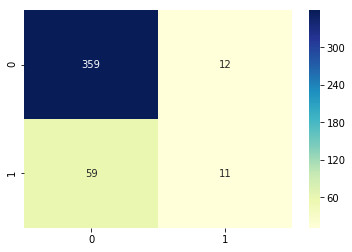

In [46]:
# Plotting the confusion matrix

sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

Search for the optimal K value

In [61]:
acc = []
K = []
k=1
for k in range(20):
    
    model = KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc.append(accuracy_score(y_test,predictions)*100)
    K.append(k)
    print(k+1,accuracy_score(y_test,predictions))   
    k=+1

1 0.7369614512471655
2 0.8480725623582767
3 0.8140589569160998
4 0.8412698412698413
5 0.8390022675736961
6 0.8435374149659864
7 0.8503401360544217
8 0.8390022675736961
9 0.8412698412698413
10 0.8435374149659864
11 0.8412698412698413
12 0.8435374149659864
13 0.8412698412698413
14 0.8412698412698413
15 0.8412698412698413
16 0.8412698412698413
17 0.8435374149659864
18 0.8412698412698413
19 0.8412698412698413
20 0.8412698412698413


K = 7 has the highest score of 0.8503401360544217

In [52]:
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [53]:
y_pred1 = clf2.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.67      0.11      0.20        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.83      0.85      0.80       441



In [59]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_pred1, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_pred1, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_pred1, 
                                             average='weighted')))

Precision Score: 	 0.8255
Recall Score: 		 0.8503
F1 Score: 		 0.8028


### SVM : Support Vector Machine

##### Linear SVM

Scale features

In [72]:
sc_x = StandardScaler()
x_std = sc_x.fit_transform(df1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,test_size=0.3,random_state=7)

In [76]:
C = 1.0
model= SVC(kernel='linear',C=C)


In [78]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
y_pred2 = model.predict(X_test)

In [91]:
confusion_matrix(y_test, y_pred2)

array([[358,  13],
       [ 56,  14]])

In [92]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_pred2, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_pred2, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_pred2, 
                                             average='weighted')))

Precision Score: 	 0.8098
Recall Score: 		 0.8435
F1 Score: 		 0.8131


#####   SVM  kernel = RBF



In [86]:
C = 1.0
model_rbf= SVC(kernel='rbf', gamma=0.7, C=C)

In [89]:
model_rbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
y_pred3 = model_rbf.predict(X_test)

In [93]:
confusion_matrix(y_test, y_pred3)

array([[371,   0],
       [ 70,   0]])

In [94]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_pred3, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_pred3, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_pred3, 
                                             average='weighted')))

Precision Score: 	 0.7077
Recall Score: 		 0.8413
F1 Score: 		 0.7687


### Grid Search

In [124]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.1,0.5,1,2,5,10,20]
    gammas = [0.001,0.01,0.1,0.25,0.5,0.75,1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [126]:
svc_param_selection(X_train, y_train,3)

{'C': 0.1, 'gamma': 0.001}

In [128]:

model_rbf_cv= SVC(kernel='rbf', gamma=0.001, C=0.1)

In [129]:
model_rbf_cv.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_pred4 = model_rbf_cv.predict(X_test)

In [131]:
confusion_matrix(y_test,y_pred4)

array([[371,   0],
       [ 70,   0]])

In [132]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_pred4, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_pred4, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_pred4, 
                                             average='weighted')))

Precision Score: 	 0.7077
Recall Score: 		 0.8413
F1 Score: 		 0.7687
